In [1]:
from moro import *
from sympy import lambdify
from numpy import pi
from scipy.optimize import least_squares
import numpy as np

In [10]:
RR = Robot((200,0,0,q1), (200,0,0,q2))

In [11]:
RR.solve_inverse_kinematics(Matrix([200,200,0]))

 active_mask: array([0, 0])
        cost: 0.0
         fun: array([0., 0., 0.])
        grad: array([0., 0.])
         jac: array([[-2.00000001e+02,  2.42851171e-06],
       [ 1.99999998e+02,  2.00000000e+02],
       [ 0.00000000e+00, -0.00000000e+00]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 0.0
      status: 1
     success: True
           x: array([ 1.57079633, -1.57079633])

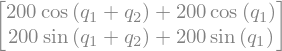

In [32]:
eqs = RR.T[:2,3]
des_pos = Matrix([200,200])
eqs

In [53]:
f = lambdify((q1,q2), eqs - des_pos, "numpy")

In [66]:
def ff(x):
    return f(*tuple(x)).flatten()

In [67]:
sol = least_squares(ff, (0.1,-0.1), bounds=([-np.inf,-np.inf],[np.inf,0]))

In [69]:
sol.x

array([ 1.57079633, -1.57079633])

In [70]:
a = [(0,1), (1,2), (4,5)]

In [74]:
list(  zip(*a) )

In [75]:
RR